In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
import numpy  as np

In [3]:
# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [4]:
path="D:\\Projects\\Data\\Titanic\\titanic"

In [7]:
#imoprt test and train datasets
df_train=pd.read_csv(path+"\\train.csv")
df_test=pd.read_csv(path+"\\test.csv")

In [12]:
#view first lines of training data
df_train.head(n=3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
#view detailed info with missing values and data types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [17]:
sampletest=df_train.PassengerId.dtype
type(sampletest)

numpy.dtype

In [18]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
#view the first lines of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
#use the DataFrame .describe() method to check out summary statistics of numeric columns (of df_train).
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


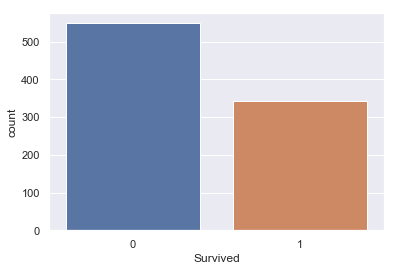

In [20]:
#check overall survied counts in seaborn

sns.countplot(x="Survived",data=df_train)

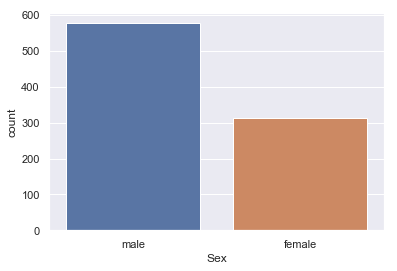

In [19]:
sns.countplot(x="Sex",data=df_train)

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


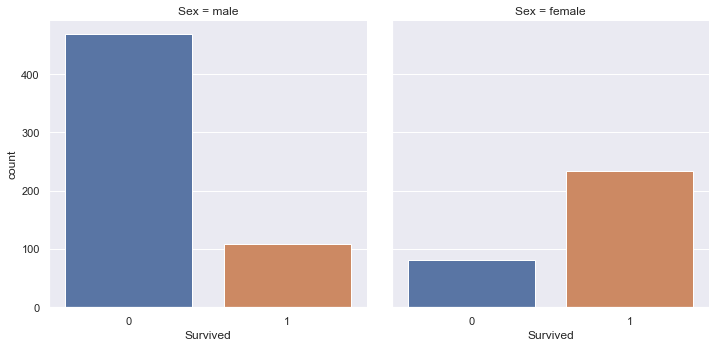

In [21]:
sns.factorplot(x="Survived",col="Sex",kind="count",data=df_train)

In [22]:
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [23]:
female_survived_percentage=df_train[df_train.Sex=="female"].Survived.sum()/df_train[df_train.Sex=="female"].Survived.count()
male_survived_percentage=df_train[df_train.Sex=="male"].Survived.sum()/df_train[df_train.Sex=="male"].Survived.count()


In [24]:
print(female_survived_percentage)
print(male_survived_percentage)

0.7420382165605095
0.18890814558058924


In [25]:
df_test["Survived"]=df_test.Sex=="female"

In [26]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True


In [27]:
df_test["Survived"]=df_test["Survived"].apply(lambda x:int(x))

In [28]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


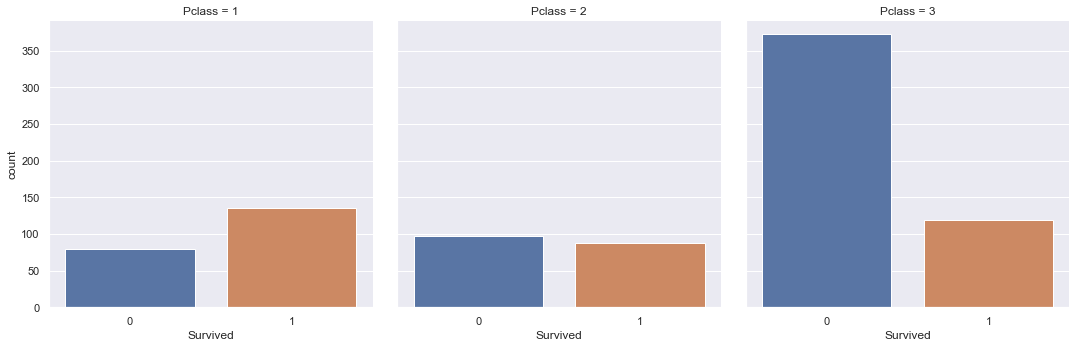

In [29]:
sns.factorplot(x="Survived",col="Pclass",kind="count",data=df_train)

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


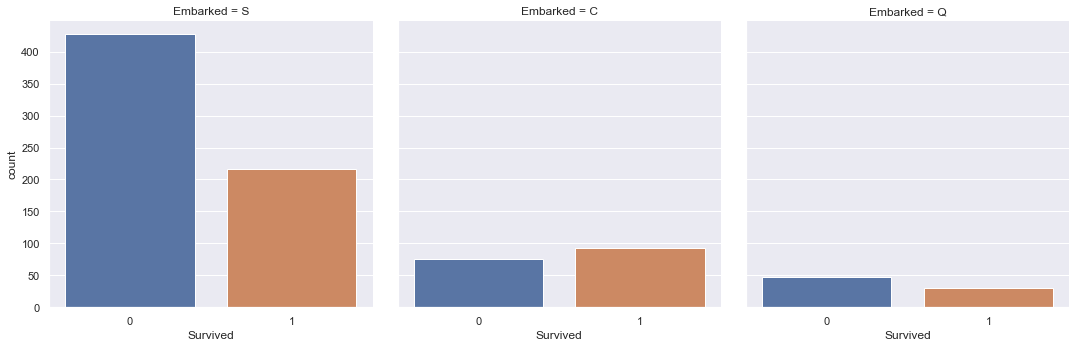

In [30]:
sns.factorplot(x="Survived",col="Embarked",kind="count",data=df_train)

In [30]:
#EDA with numerical values


C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


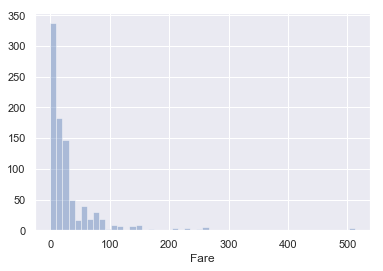

In [31]:
sns.distplot(df_train.Fare,kde=False)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

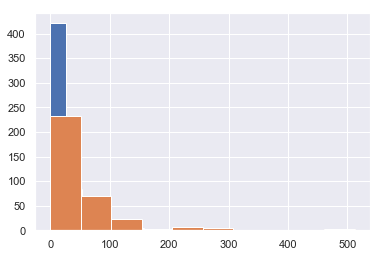

In [32]:
df_train.groupby(["Survived"]).Fare.hist()

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

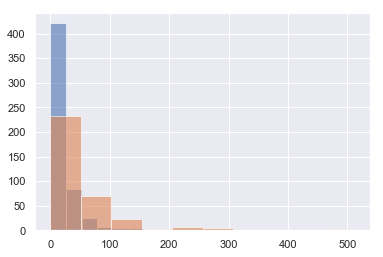

In [33]:
df_train.groupby(["Survived"]).Fare.hist(alpha=0.6)

In [34]:
df_train_drop=df_train.dropna()

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


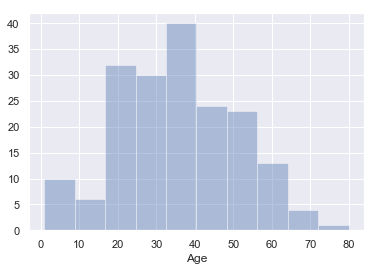

In [35]:
sns.distplot(df_train_drop.Age,kde=False)

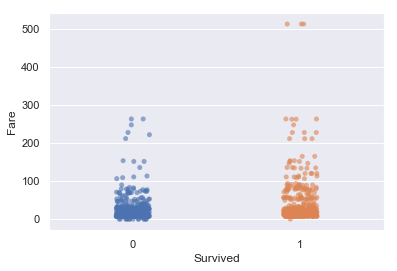

In [36]:
sns.stripplot(x="Survived",y="Fare",data=df_train,jitter=True,alpha=0.6)

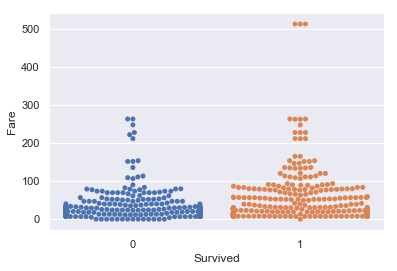

In [37]:
sns.swarmplot(x="Survived",y="Fare",data=df_train)

In [38]:
df_train.groupby(["Survived"]).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


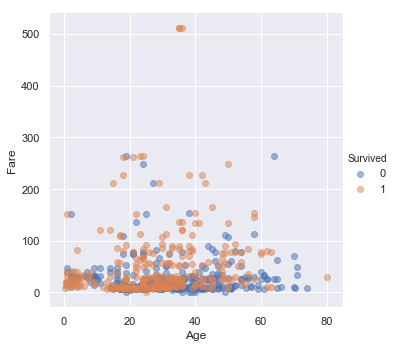

In [39]:
#scatterPlot
sns.lmplot(x="Age",y="Fare",hue="Survived",data=df_train,fit_reg=False,scatter_kws={'alpha':0.5})

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packa

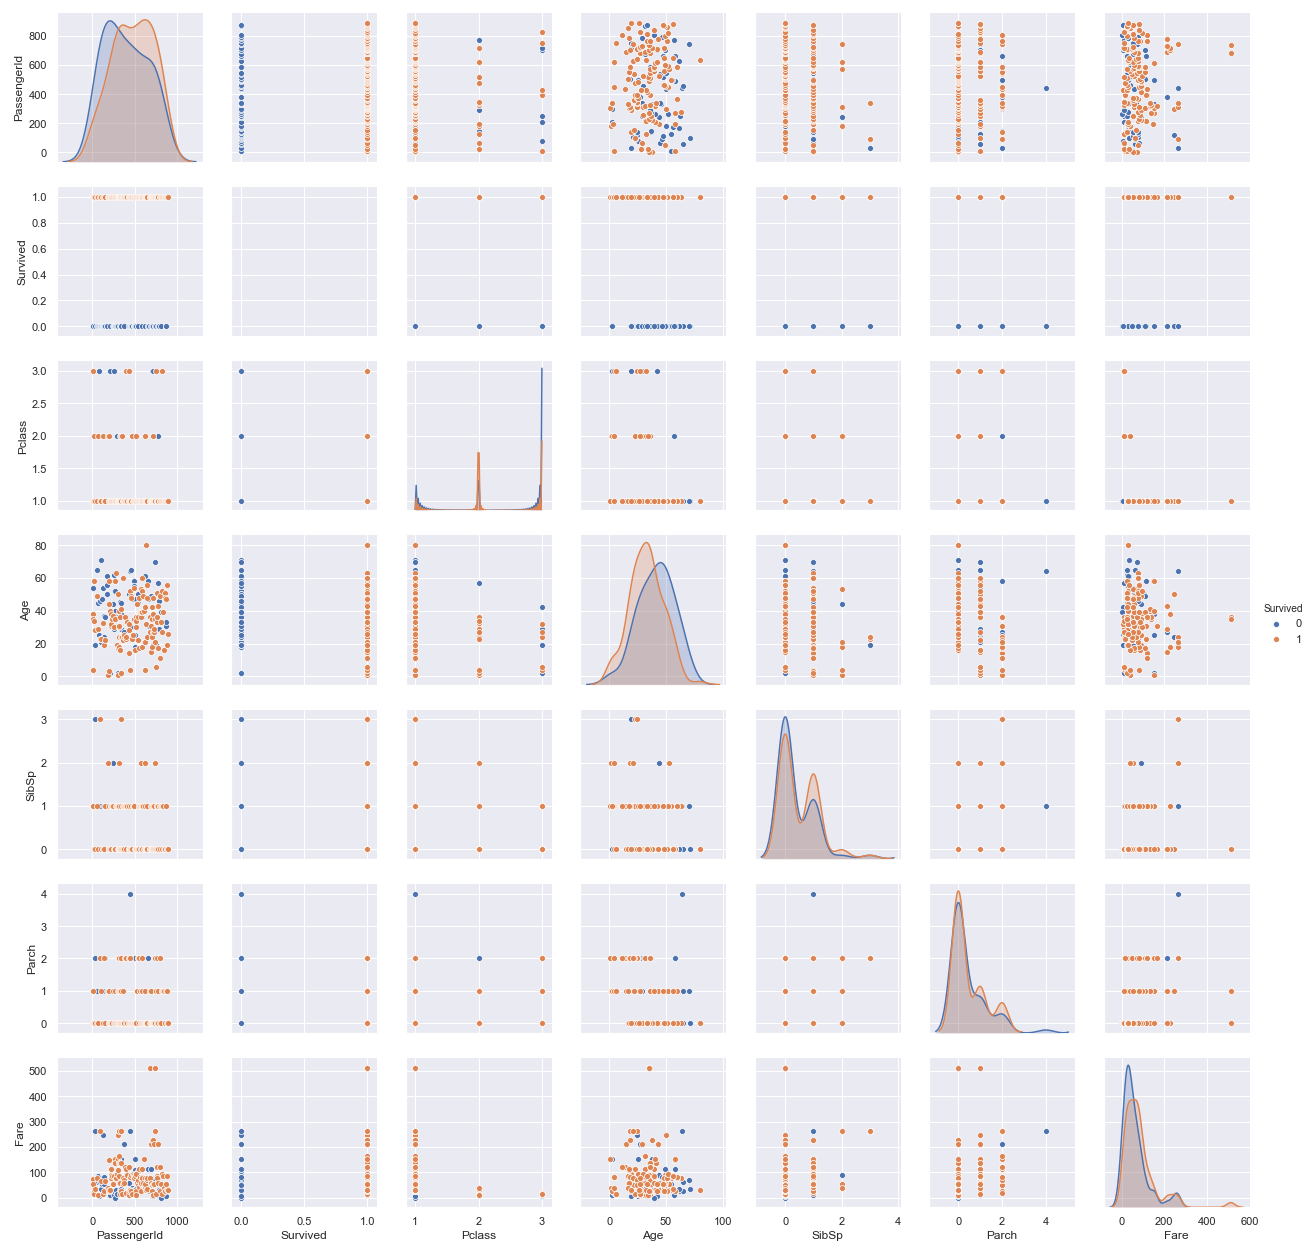

In [40]:
sns.pairplot(df_train_drop,hue="Survived")

In [41]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [42]:
df_test[["PassengerId","Survived"]].to_csv(path+"\\women_survived.csv",index=False)

In [41]:
pd.crosstab(df_train["Pclass"],df_train["Survived"],margins=True).style.background_gradient(cmap="autumn_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [42]:
print("% of survivals in") 
print("Pclass=1 : ", df_train.Survived[df_train.Pclass == 1].sum()/df_train[df_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", df_train.Survived[df_train.Pclass == 2].sum()/df_train[df_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", df_train.Survived[df_train.Pclass == 3].sum()/df_train[df_train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


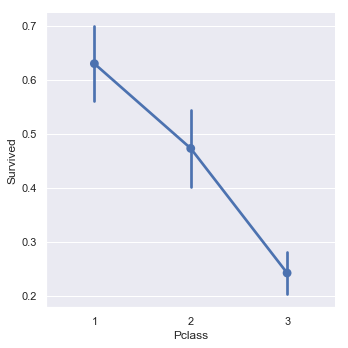

In [43]:
sns.catplot('Pclass','Survived',kind='point',data=df_train)

In [44]:
pd.crosstab([df_train.Sex, df_train.Survived], df_train.Pclass, margins=True).style.background_gradient(cmap='autumn_r')

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


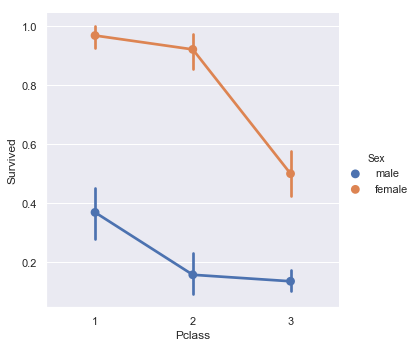

In [45]:
sns.catplot('Pclass','Survived',hue='Sex',data=df_train,kind='point')

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


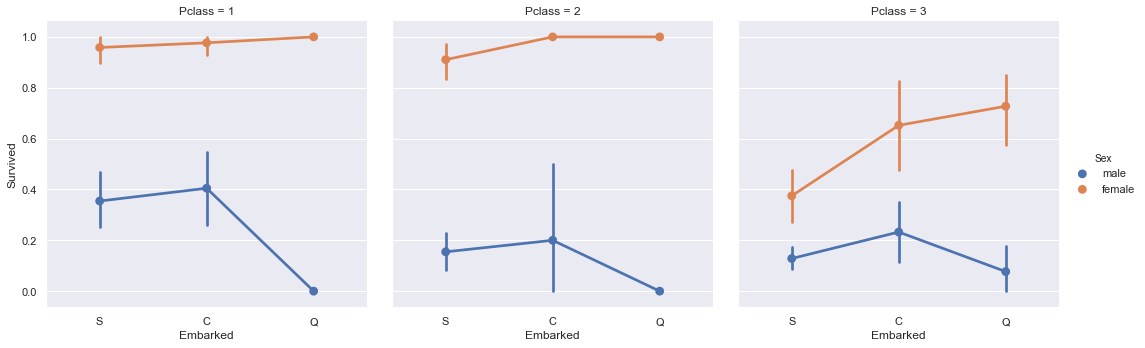

In [46]:
sns.catplot('Embarked','Survived',col='Pclass',hue='Sex',data=df_train,kind='point')

In [47]:
pd.crosstab([df_train.Survived], [df_train.Sex, df_train.Pclass, df_train.Embarked], margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

In [50]:
df_test["Survived"]=0

In [51]:
#all women survived
df_test.loc[(df_test.Sex=="female"),"Survived"]=1

In [52]:
#except for those in Pclass 3 and embarked in S
df_test.loc[(df_test.Pclass==3)&(df_test.Embarked=="S")&(df_test.Sex=="female"),"Survived"]=0

In [53]:
df_test[["PassengerId","Survived"]].to_csv(path+"\\embarked_pclass_sex.csv",index=False)

In [54]:
#Age: Continuous numerical to 8 
for df in [df_train,df_test]:
    df["Age_bin"]=np.nan
    for i in range(8,0,-1):
        df.loc[df["Age"]<=i*10,"Age_bin"]=i

In [55]:
print(df_train[["Age","Age_bin"]].head(10))

    Age  Age_bin
0  22.0      3.0
1  38.0      4.0
2  26.0      3.0
3  35.0      4.0
4  35.0      4.0
5   NaN      NaN
6  54.0      6.0
7   2.0      1.0
8  27.0      3.0
9  14.0      2.0


C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


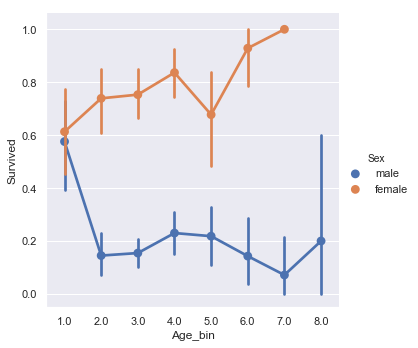

In [56]:
sns.catplot("Age_bin","Survived",hue="Sex",data=df_train,kind="point")

In [57]:
pd.crosstab([df_train.Survived], [df_train.Age_bin, df_train.Sex], margins=True).style.background_gradient(cmap='autumn_r')

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


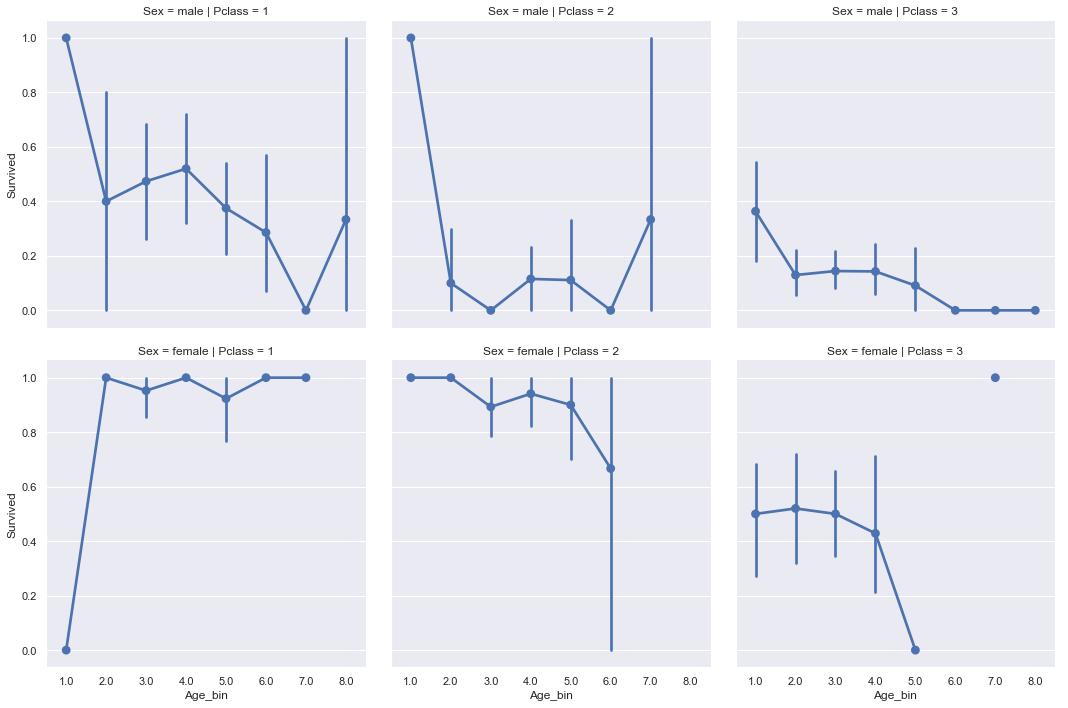

In [77]:
sns.catplot("Age_bin","Survived",col="Pclass",row="Sex",kind="point",data=df_train)

In [78]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Age_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [79]:
# in Pclass 1 and 2 all men in Age_bin = 1 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Age_bin == 1), 'Survived'] = 1
df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 2) & (df_test.Age_bin == 1), 'Survived'] = 1

In [81]:
df_test[["PassengerId","Survived"]].to_csv(path+"\\age_pclass_sex.csv",index=False)

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


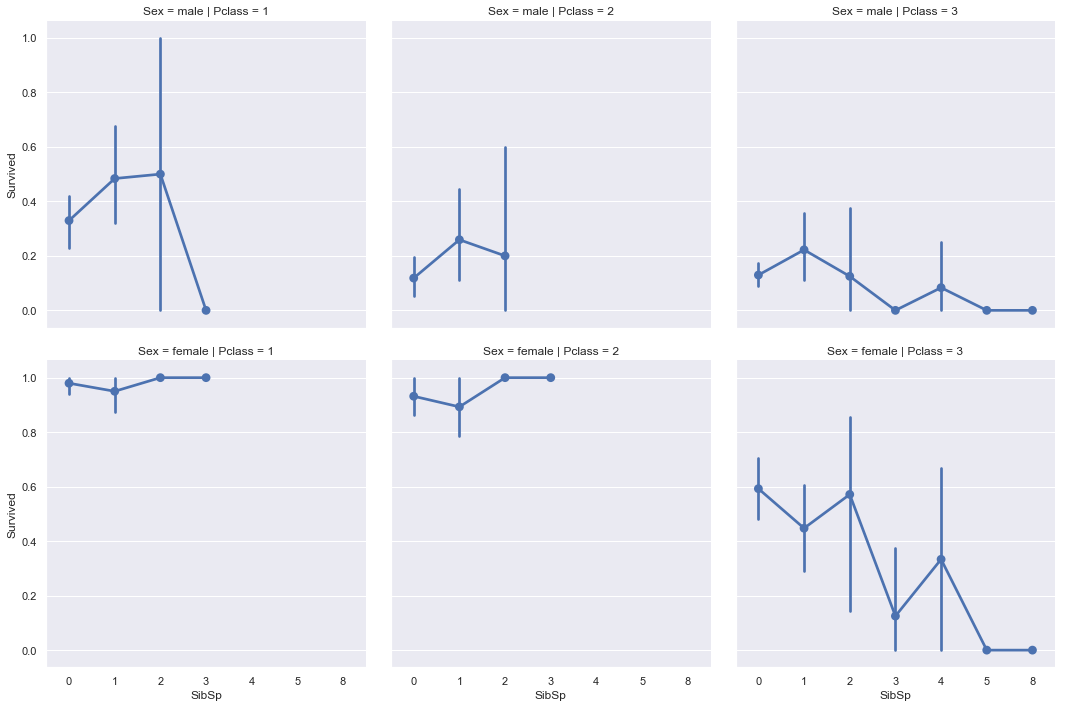

In [50]:
#SibSp and Parch
sns.catplot('SibSp','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

In [52]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.SibSp, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')


'''For males, no survival rate above 0.5 for any values of SibSp. 
For females, passengers with SibSp = 3 and Pclass = 3 died, also all females with SibSp > 4 died. 
For females with SibSp = 1 and Pclass = 3 survival rate is below 0.5'''


In [84]:
# all females with SibSp > 7 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.SibSp > 7) , 'Survived'] = 0

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


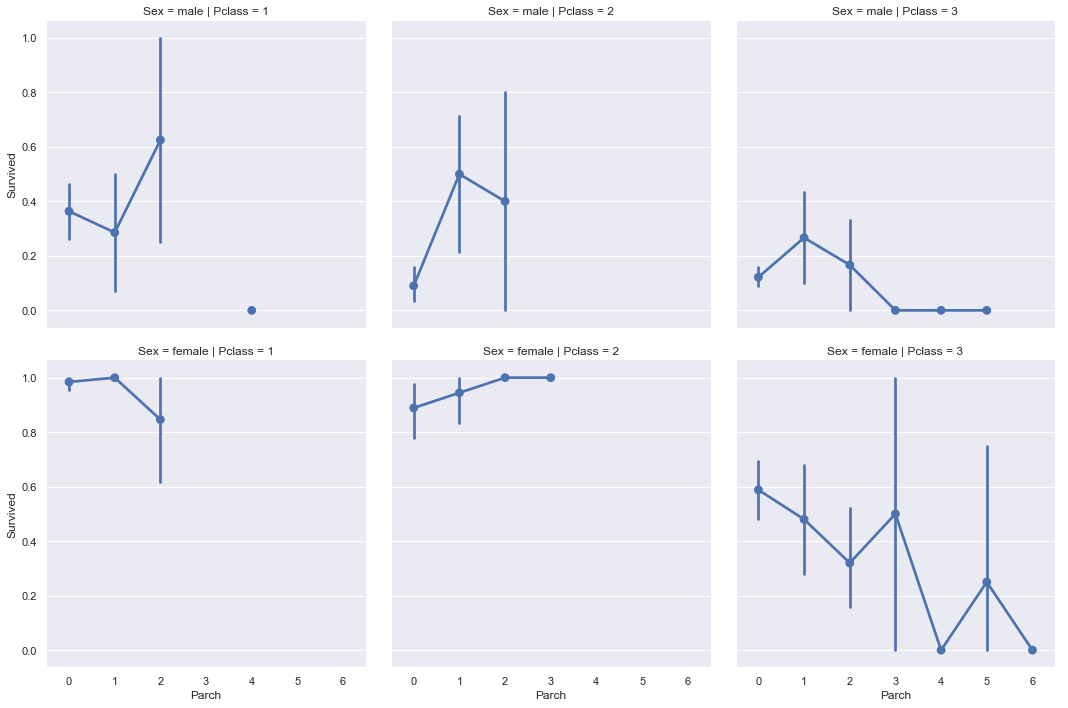

In [85]:
sns.catplot('Parch','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

In [53]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Parch, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [87]:
'''Very similar to SibSp - 1 , but different values ? For females with Parch = 2 and Pclass = 3 survival rate is below 0.5
All females with Parch = 4 and Pclass = 3 died. All females with Parch > 4 died. 
(For females with Parch = 1 and Pclass = 3 survival rate is below 0.5) For males,all survival rates below 0.5 for 
any values of Parch, except for Parch = 2 and Pclass = 1.'''

'Very similar to SibSp - 1 , but different values ? For females with Parch = 2 and Pclass = 3 survival rate is below 0.5\nAll females with Parch = 4 and Pclass = 3 died. All females with Parch > 4 died. \n(For females with Parch = 1 and Pclass = 3 survival rate is below 0.5) For males,all survival rates below 0.5 for \nany values of Parch, except for Parch = 2 and Pclass = 1.'

In [88]:
# survival rate is below 0.5 for females with Parch = 2 and Pclass = 3 
#df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 2), 'Survived'] = 0

# All females with Parch = 4 and Pclass = 3 died
##df_test.loc[ (df_test.Sex == 'female') & (df_test.Pclass == 3) & (df_test.Parch == 4), 'Survived'] = 0

# all females with Parch > 4 died
df_test.loc[ (df_test.Sex == 'female') & (df_test.Parch > 4) , 'Survived'] = 0

# For males with Parch = 2 and Pclass = 1 survival rate is above 0.5
##df_test.loc[ (df_test.Sex == 'male') & (df_test.Pclass == 1) & (df_test.Parch == 1) , 'Survived'] = 1

In [89]:
df_test[["PassengerId","Survived"]].to_csv(path+"\\parch_sibsp_sex_pclass.csv",index=False)

In [90]:
#Fare: continuous numerical to 12 bins

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


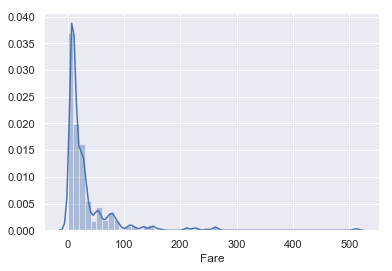

In [91]:
sns.distplot(df_train['Fare'])
plt.show()

In [92]:
for df in [df_train, df_test]:
    df['Fare_bin']=np.nan
    for i in range(12,0,-1):
        df.loc[ df['Fare'] <= i*50, 'Fare_bin'] = i

C:\Users\M1046091\AppData\Local\Continuum\anaconda3\envs\condaOpenCV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


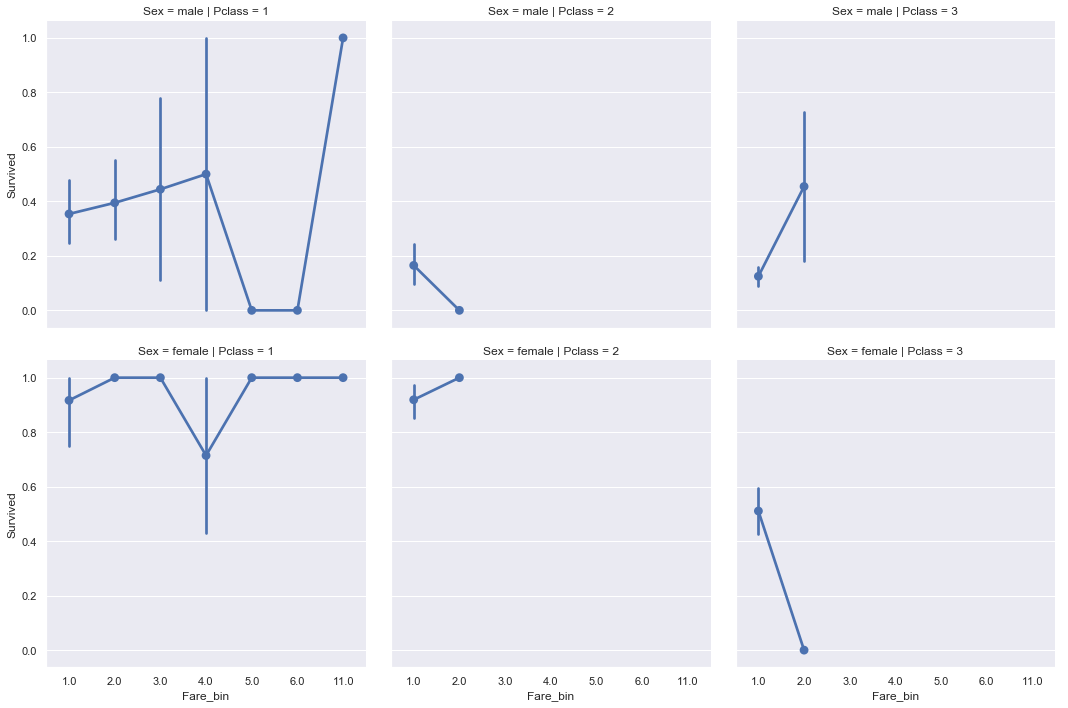

In [93]:
sns.catplot('Fare_bin','Survived', col='Pclass' , row = 'Sex', kind='point', data=df_train)

In [94]:
pd.crosstab([df_train.Sex, df_train.Survived], [df_train.Fare_bin, df_train.Pclass], margins=True).style.background_gradient(cmap='autumn_r')

In [95]:
# males in Fare_bin = 11 survived
df_test.loc[ (df_test.Sex == 'male') & (df_test.Fare_bin == 11), 'Survived'] = 1

In [96]:
df_test[['PassengerId', 'Survived']].to_csv(path+'\\fareIncluded.csv', index=False)

In [97]:
df_test.drop(['Survived'],axis=1,inplace=True)

In [98]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_bin,Fare_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,4.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,5.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,7.0,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3.0,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.0,1.0
